# Your name: <Enter your name>
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [236]:
# import packages 
import pandas as pd
import numpy as np


# Data File Reading Section
## Write code to read in data from external sources here

In [237]:
#read datasets
df = pd.read_csv('/content/data.csv',na_values=0, encoding='cp1252')
df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [238]:
# Your code for this section here ...
df.describe()

,so2,no2,rspm,spm,pm2_5
count,400221.000000,418724.000000,394754.000000,197142.000000,9314.000000
mean,10.853091,25.858009,109.043969,222.141944,40.791467
std,11.177910,18.486613,74.791245,150.863648,30.832525
min,0.100000,0.200000,1.000000,1.000000,3.000000
25%,5.000000,14.000000,56.000000,112.000000,24.000000
50%,8.000000,22.000000,90.000000,188.000000,32.000000
75%,13.700000,32.200000,142.000000,297.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [239]:
df.shape

(435742, 13)

In [240]:
df.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            400221
no2                            418724
rspm                           394754
spm                            197142
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [241]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             35521
no2                             17018
rspm                            40988
spm                            238600
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          400221 non-null  float64
 7   no2                          418724 non-null  float64
 8   rspm                         394754 non-null  float64
 9   spm                          197142 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [243]:
df.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [244]:
df.tail(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,09-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-09
435733,SAMP,12-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-12
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-21
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [245]:
# Cleaning up the data

#dropping columns that aren't required

# ... your code here

# dropping rows where no date is available

# ... your code here

#data columns: 	stn_code	sampling_date	state	location	agency	type so2	no2	rspm	spm	location_monitoring_station	pm2_5	date
#Drop stn_code, agency, sampling_date, location_monitoring_agency
#New data: state	location type so2	no2	rspm	spm pm2_5	date

df = df.loc[:,['state',	'location', 'type', 'so2',	'no2',	'rspm',	'spm', 'pm2_5',	'date']]

In [246]:
# displaying final columns (data.columns)
df.columns

# ... your code here
#Drop columns where there is NaN in Date

#Doesn't work
#df['date'].dropna(how = "all", axis = 0,inplace = True) 
df = df[df['date'].notnull()]

In [247]:
#No null values in those columns
df.isnull().sum()

state            0
location         0
type          5390
so2          35518
no2          17015
rspm         40985
spm         238593
pm2_5       426421
date             0
dtype: int64

In [248]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,NaN,NaN,2015-12-15
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,NaN,NaN,2015-12-18
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,NaN,NaN,2015-12-21
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24


### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [249]:
# ... Your code here
#df['type'].replace({ "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S", "Sensitive": "S", "np.nan": "RRO" })

types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }

df.type = df.type.replace(types)

In [250]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,NaN,NaN,2015-12-15
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,NaN,NaN,2015-12-18
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,NaN,NaN,2015-12-21
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24


In [251]:
# Display top 10 records after codification of 'types'
# ... Your code here
#
df.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [252]:
# ... Your code here
#convert to datetime
df['date']= pd.to_datetime(df['date'])
#Extract year to populate new column year
df['year'] = df['date'].dt.year

In [253]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990
...,...,...,...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,NaN,NaN,2015-12-15,2015
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,NaN,NaN,2015-12-18,2015
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,NaN,NaN,2015-12-21,2015
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24,2015


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [254]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset



# ... your code here
#remove null values from SO2, NO2, rspm, spm, pm2_5
#fill missing value with imputer from sklearn
from sklearn.impute import SimpleImputer
#imp = SimpleImputer(missing_values=-1, strategy='mean')
dfnew = df.loc[:,['so2','no2', 'rspm', 'spm', 'pm2_5']]
imp = SimpleImputer(missing_values = np.nan, strategy='mean')
#Fit then transform
imp.fit(dfnew)
dftransformed = imp.transform(dfnew)
dftransformednew = imp.transform(dftransformed)
#Dataframe turned into nested list arrays
#now convert it back into it being a dataframe
dfnew = pd.DataFrame(dftransformednew)
dfnew.columns = ['so2','no2', 'rspm', 'spm', 'pm2_5']

#Drop 'so2','no2', 'rspm', 'spm', 'pm2_5' in original dataframe
df = df.loc[:,['state', 'location',	'type', 'date', 'year']]
result = pd.concat([df, dfnew], axis=1)

#Figure out a way to do this without dropping columns !!! DO LATER
#result2 = pd.merge(df, dfnew, how='right')

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

In [255]:
result
check = result.groupby('state')['so2'].agg(['median'])

### so2 status

([<matplotlib.axis.XTick at 0x7f911dd87630>,
 [Text(0, 0, 'Nagaland'),
  Text(0, 0, 'Mizoram'),
  Text(0, 0, 'Meghalaya'),
  Text(0, 0, 'Arunachal Pradesh'),
  Text(0, 0, 'Himachal Pradesh'),
  Text(0, 0, 'Kerala'),
  Text(0, 0, 'Telangana'),
  Text(0, 0, 'Odisha'),
  Text(0, 0, 'Jammu & Kashmir'),
  Text(0, 0, 'Andhra Pradesh'),
  Text(0, 0, 'Goa'),
  Text(0, 0, 'Rajasthan'),
  Text(0, 0, 'Delhi'),
  Text(0, 0, 'Assam'),
  Text(0, 0, 'Puducherry'),
  Text(0, 0, 'Daman & Diu'),
  Text(0, 0, 'Chandigarh'),
  Text(0, 0, 'West Bengal'),
  Text(0, 0, 'Dadra & Nagar Haveli'),
  Text(0, 0, 'Karnataka'),
  Text(0, 0, 'Uttar Pradesh'),
  Text(0, 0, 'Tamil Nadu'),
  Text(0, 0, 'Punjab'),
  Text(0, 0, 'Manipur'),
  Text(0, 0, 'Bihar'),
  Text(0, 0, 'Haryana'),
  Text(0, 0, 'Madhya Pradesh'),
  Text(0, 0, 'Chhattisgarh'),
  Text(0, 0, 'Maharashtra'),
  Text(0, 0, 'Gujarat'),
  Text(0, 0, 'Jharkhand'),
  Text(0, 0, 'Uttarakhand'),
  Text(0, 0, 'Uttaranchal'),
  Text(0, 0, 'Sikkim')])

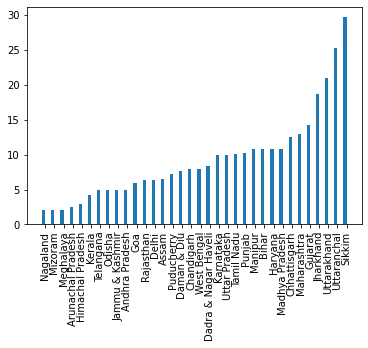

In [256]:
# ... Your code here
import matplotlib.pyplot as plt
dfso2 = result.groupby('state')['so2'].agg(['median'])
#Sort ascending table then barplot
dfso2 = dfso2.sort_values(by='median')
dfso2['state'] = dfso2.index
dfso2.state.count()

n = 34
ind = np.arange(n)
width = 0.35
dfso2med = dfso2['median']

plt.bar(ind, dfso2med, width)

plt.xticks(ind+width / 2, dfso2.index, rotation=90)



### no2 status

([<matplotlib.axis.XTick at 0x7f911dc74400>,
 [Text(0, 0, 'Sikkim'),
  Text(0, 0, 'Arunachal Pradesh'),
  Text(0, 0, 'Mizoram'),
  Text(0, 0, 'Nagaland'),
  Text(0, 0, 'Meghalaya'),
  Text(0, 0, 'Goa'),
  Text(0, 0, 'Puducherry'),
  Text(0, 0, 'Jammu & Kashmir'),
  Text(0, 0, 'Himachal Pradesh'),
  Text(0, 0, 'Kerala'),
  Text(0, 0, 'Assam'),
  Text(0, 0, 'Odisha'),
  Text(0, 0, 'Daman & Diu'),
  Text(0, 0, 'Dadra & Nagar Haveli'),
  Text(0, 0, 'Chandigarh'),
  Text(0, 0, 'Manipur'),
  Text(0, 0, 'Madhya Pradesh'),
  Text(0, 0, 'Andhra Pradesh'),
  Text(0, 0, 'Tamil Nadu'),
  Text(0, 0, 'Karnataka'),
  Text(0, 0, 'Chhattisgarh'),
  Text(0, 0, 'Telangana'),
  Text(0, 0, 'Haryana'),
  Text(0, 0, 'Gujarat'),
  Text(0, 0, 'Uttarakhand'),
  Text(0, 0, 'Rajasthan'),
  Text(0, 0, 'Uttar Pradesh'),
  Text(0, 0, 'Uttaranchal'),
  Text(0, 0, 'Punjab'),
  Text(0, 0, 'Maharashtra'),
  Text(0, 0, 'Bihar'),
  Text(0, 0, 'Jharkhand'),
  Text(0, 0, 'Delhi'),
  Text(0, 0, 'West Bengal')])

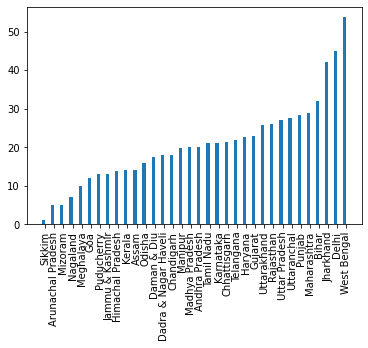

In [257]:
# ... Your code here
dfno2 = result.groupby('state')['no2'].agg(['median'])
#Sort ascending table then barplot
dfno2 = dfno2.sort_values(by='median')
dfno2['state'] = dfno2.index
dfno2.state.count()

n = 34
ind = np.arange(n)
width = 0.35
dfno2med = dfno2['median']

plt.bar(ind, dfno2med, width)

plt.xticks(ind+width / 2, dfno2.index, rotation=90)

### rspm status

([<matplotlib.axis.XTick at 0x7f911db75748>,
 [Text(0, 0, 'Mizoram'),
  Text(0, 0, 'Puducherry'),
  Text(0, 0, 'Kerala'),
  Text(0, 0, 'Meghalaya'),
  Text(0, 0, 'Goa'),
  Text(0, 0, 'Tamil Nadu'),
  Text(0, 0, 'Manipur'),
  Text(0, 0, 'Karnataka'),
  Text(0, 0, 'Arunachal Pradesh'),
  Text(0, 0, 'Andhra Pradesh'),
  Text(0, 0, 'Assam'),
  Text(0, 0, 'Nagaland'),
  Text(0, 0, 'Telangana'),
  Text(0, 0, 'Odisha'),
  Text(0, 0, 'Chandigarh'),
  Text(0, 0, 'Himachal Pradesh'),
  Text(0, 0, 'Dadra & Nagar Haveli'),
  Text(0, 0, 'Maharashtra'),
  Text(0, 0, 'Gujarat'),
  Text(0, 0, 'West Bengal'),
  Text(0, 0, 'Chhattisgarh'),
  Text(0, 0, 'Daman & Diu'),
  Text(0, 0, 'Bihar'),
  Text(0, 0, 'Sikkim'),
  Text(0, 0, 'Madhya Pradesh'),
  Text(0, 0, 'Uttaranchal'),
  Text(0, 0, 'Rajasthan'),
  Text(0, 0, 'Jammu & Kashmir'),
  Text(0, 0, 'Uttarakhand'),
  Text(0, 0, 'Delhi'),
  Text(0, 0, 'Haryana'),
  Text(0, 0, 'Punjab'),
  Text(0, 0, 'Uttar Pradesh'),
  Text(0, 0, 'Jharkhand')])

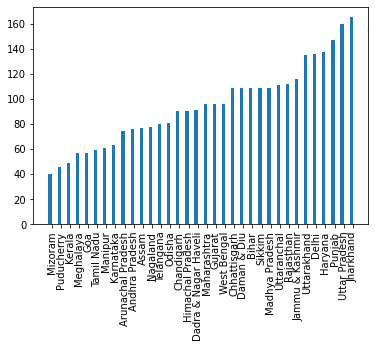

In [258]:
# ... Your code here
dfrspm = result.groupby('state')['rspm'].agg(['median'])
#Sort ascending table then barplot
dfrspm = dfrspm.sort_values(by='median')
dfrspm['state'] = dfrspm.index
dfrspm.state.count()

n = 34
ind = np.arange(n)
width = 0.35
dfrspmmed = dfrspm['median']

plt.bar(ind, dfrspmmed, width)

plt.xticks(ind+width / 2, dfrspm.index, rotation=90)


### spm status

([<matplotlib.axis.XTick at 0x7f911ebdab70>,
 [Text(0, 0, 'Manipur'),
  Text(0, 0, 'Puducherry'),
  Text(0, 0, 'Daman & Diu'),
  Text(0, 0, 'Sikkim'),
  Text(0, 0, 'Andhra Pradesh'),
  Text(0, 0, 'Meghalaya'),
  Text(0, 0, 'Mizoram'),
  Text(0, 0, 'Nagaland'),
  Text(0, 0, 'Odisha'),
  Text(0, 0, 'Punjab'),
  Text(0, 0, 'Rajasthan'),
  Text(0, 0, 'Tamil Nadu'),
  Text(0, 0, 'Telangana'),
  Text(0, 0, 'Uttar Pradesh'),
  Text(0, 0, 'Uttarakhand'),
  Text(0, 0, 'Maharashtra'),
  Text(0, 0, 'Madhya Pradesh'),
  Text(0, 0, 'Kerala'),
  Text(0, 0, 'Karnataka'),
  Text(0, 0, 'Jharkhand'),
  Text(0, 0, 'Jammu & Kashmir'),
  Text(0, 0, 'Himachal Pradesh'),
  Text(0, 0, 'Haryana'),
  Text(0, 0, 'Gujarat'),
  Text(0, 0, 'Goa'),
  Text(0, 0, 'Dadra & Nagar Haveli'),
  Text(0, 0, 'Chhattisgarh'),
  Text(0, 0, 'Chandigarh'),
  Text(0, 0, 'Bihar'),
  Text(0, 0, 'Assam'),
  Text(0, 0, 'Arunachal Pradesh'),
  Text(0, 0, 'West Bengal'),
  Text(0, 0, 'Delhi'),
  Text(0, 0, 'Uttaranchal')])

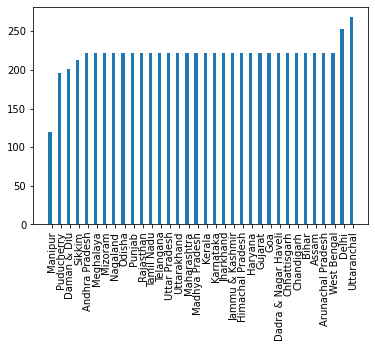

In [259]:
# ... Your code here
dfspm = result.groupby('state')['spm'].agg(['median'])
#Sort ascending table then barplot
dfspm = dfspm.sort_values(by='median')
dfspm['state'] = dfspm.index
dfspm.state.count()

n = 34
ind = np.arange(n)
width = 0.35
dfspmmed = dfspm['median']

plt.bar(ind, dfspmmed, width)

plt.xticks(ind+width / 2, dfspm.index, rotation=90)


### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [260]:
result

,state,location,type,date,year,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,RRO,1990-02-01,1990.0,4.8,17.4,109.044278,222.141944,40.791467
1,Andhra Pradesh,Hyderabad,I,1990-02-01,1990.0,3.1,7.0,109.044278,222.141944,40.791467
2,Andhra Pradesh,Hyderabad,RRO,1990-02-01,1990.0,6.2,28.5,109.044278,222.141944,40.791467
3,Andhra Pradesh,Hyderabad,RRO,1990-03-01,1990.0,6.3,14.7,109.044278,222.141944,40.791467
4,Andhra Pradesh,Hyderabad,I,1990-03-01,1990.0,4.7,7.5,109.044278,222.141944,40.791467
...,...,...,...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,RIRUO,2015-12-15,2015.0,20.0,46.0,171.000000,222.141944,40.791467
435735,West Bengal,ULUBERIA,RIRUO,2015-12-18,2015.0,NaN,NaN,NaN,NaN,NaN
435736,West Bengal,ULUBERIA,RIRUO,2015-12-21,2015.0,NaN,NaN,NaN,NaN,NaN
435737,West Bengal,ULUBERIA,RIRUO,2015-12-24,2015.0,NaN,NaN,NaN,NaN,NaN


In [261]:
dfandhranew

,no2,so2,rspm,spm,year
,mean,mean,mean,mean,
year,,,,,
1990.0,15.296552,8.868966,109.044278,165.984875,1990.0
1991.0,18.827778,10.811111,109.044278,154.503943,1991.0
1992.0,36.013978,19.766738,109.044278,210.643678,1992.0
1993.0,15.961111,8.544444,109.044278,222.141944,1993.0
1994.0,18.273016,10.760317,109.044278,178.677526,1994.0
1995.0,33.531868,17.225275,109.044278,167.293513,1995.0
1996.0,36.589482,19.861099,109.044278,180.345095,1996.0
1997.0,38.163330,20.339507,109.044278,177.785714,1997.0


In [262]:
# ... Your code here
dfandhra = result.loc[result.state == 'Andhra Pradesh', ['no2', 'so2', 'rspm', 'spm','year']]
dfandhranew = dfandhra.groupby('year').agg(['mean'])

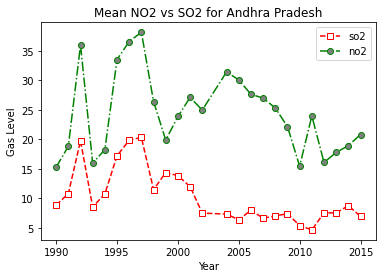

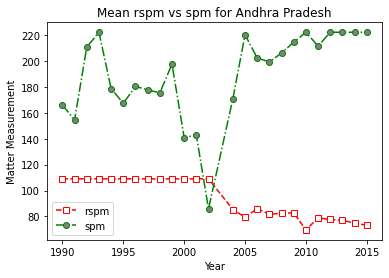

In [263]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

# ... Your code here

so2mean = dfandhranew['so2']
no2mean = dfandhranew['no2']

plt.plot(so2mean, ls= '--',color='red',marker='s', markerfacecolor= 'white',label='so2')
plt.plot(no2mean, ls= '-.', color='g', marker='o', markerfacecolor='grey',label='no2')
plt.legend()
plt.title('Mean NO2 vs SO2 for Andhra Pradesh')
plt.xlabel('Year')
plt.ylabel('Gas Level')
plt.show()


rspmmean = dfandhranew['rspm']
spmmean = dfandhranew['spm']

plt.plot(rspmmean, ls= '--',color='red',marker='s', markerfacecolor= 'white',label='rspm')
plt.plot(spmmean, ls= '-.', color='g', marker='o', markerfacecolor='grey',label='spm')
plt.legend()
plt.title('Mean rspm vs spm for Andhra Pradesh')
plt.xlabel('Year')
plt.ylabel('Matter Measurement')
plt.show()

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



The most alarming thing I noticed is that spm level for State of Andhra Pradesh increased significantly after a large dip in the early 2000s. After the increment, the level of spm remained significantly high til the most recent data. Another alarming thing I noticed is that no2 level remained moderately high in comparison to no2 over the years.